In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

## Training Image Preprocessing

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
    
)

Found 25661 files belonging to 14 classes.


### Validation Image Preprocessing

In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
)

Found 25661 files belonging to 14 classes.


In [11]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 14), dtype=tf.float32, name=None))>

### test if model is picking data

In [13]:
for x,y in training_set:
 print(x)
 print(y)
 break

tf.Tensor(
[[[[114.25 108.25 118.25]
   [116.75 110.75 120.75]
   [119.25 113.25 123.25]
   ...
   [115.   109.   113.  ]
   [118.75 112.75 116.75]
   [117.   111.   115.  ]]

  [[119.   113.   123.  ]
   [119.5  113.5  123.5 ]
   [118.   112.   122.  ]
   ...
   [118.   112.   116.  ]
   [119.   113.   117.  ]
   [114.25 108.25 112.25]]

  [[117.   111.   121.  ]
   [118.75 112.75 122.75]
   [120.   114.   124.  ]
   ...
   [113.   107.   111.  ]
   [115.   109.   113.  ]
   [119.75 113.75 117.75]]

  ...

  [[108.75  93.    67.25]
   [124.75 113.    80.75]
   [100.75  95.75  54.  ]
   ...
   [140.5  133.5  140.5 ]
   [133.75 126.75 133.75]
   [129.5  122.5  129.5 ]]

  [[114.75  90.5   61.5 ]
   [136.25 118.25  88.25]
   [175.   165.25 132.5 ]
   ...
   [128.   121.   128.  ]
   [138.25 131.25 138.25]
   [127.5  120.5  127.5 ]]

  [[130.75 101.75  72.25]
   [137.5  114.75  87.5 ]
   [157.   143.5  119.  ]
   ...
   [127.   120.   127.  ]
   [131.25 124.25 131.25]
   [131.5  124.5  13

### To Avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There maybe a chance of underfitting so increase the number of neurons
3. Add more convolution layer to extract more feature from image 

### Building Model

In [19]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()

## building Convolution Layer

In [24]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\CONDRAD\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2)) 

In [34]:
model.add(Dropout(0.25)) # to avoid overfitting

In [36]:
model.add(Flatten())

In [38]:
model.add(Dense(units=1500,activation='relu'))

In [40]:
model.add(Dropout(0.3)) 

## output Layer


In [43]:
model.add(Dense(units=14,activation='softmax'))

## compiling Model

In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │          21,014 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,806,738 (29.78 MB)

 Trainable params: 7,806,738 (29.78 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [71]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 3324s 4s/step - accuracy: 0.9148 - loss: 0.2434 - val_accuracy: 0.9459 - val_loss: 0.1685
Epoch 2/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2905s 4s/step - accuracy: 0.9354 - loss: 0.1891 - val_accuracy: 0.9627 - val_loss: 0.1163
Epoch 3/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2609s 3s/step - accuracy: 0.9512 - loss: 0.1453 - val_accuracy: 0.9723 - val_loss: 0.0829
Epoch 4/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2335s 3s/step - accuracy: 0.9602 - loss: 0.1161 - val_accuracy: 0.9785 - val_loss: 0.0649
Epoch 5/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2168s 3s/step - accuracy: 0.9669 - loss: 0.1014 - val_accuracy: 0.9808 - val_loss: 0.0566
Epoch 6/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2205s 3s/step - accuracy: 0.9674 - loss: 0.0954 - val_accuracy: 0.9793 - val_loss: 0.0619
Epoch 7/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2488s 3s/step - accuracy: 0.9736 - loss: 0.0761 - val_accuracy: 0.9829 - val_loss: 0.0493
Epoch 8/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2709s 3s/step - accuracy: 0.9762 - loss: 0.0688 - 

### Model Evaluation

### Model Evaluation on training set

In [53]:
train_loss,train_acc = model.evaluate(training_set)

802/802 ━━━━━━━━━━━━━━━━━━━━ 435s 542ms/step - accuracy: 0.7899 - loss: 0.6058


In [54]:
print(train_loss,train_acc)

0.5975527167320251 0.7925256490707397


In [55]:
val_loss,val_acc = model.evaluate(validation_set)

802/802 ━━━━━━━━━━━━━━━━━━━━ 523s 652ms/step - accuracy: 0.7876 - loss: 0.6134


In [56]:
print(val_loss,val_acc)

0.5975525975227356 0.7925256490707397


### Saving Model

In [68]:
model.save("trained_model.keras")

In [73]:
training_history.history['val_accuracy']

[0.9459101557731628,
 0.9626671075820923,
 0.9722536206245422,
 0.9784887433052063,
 0.980787992477417,
 0.9792681336402893,
 0.9829313158988953,
 0.9888157248497009,
 0.9941155910491943,
 0.9862047433853149]

### Accuracy Visualization

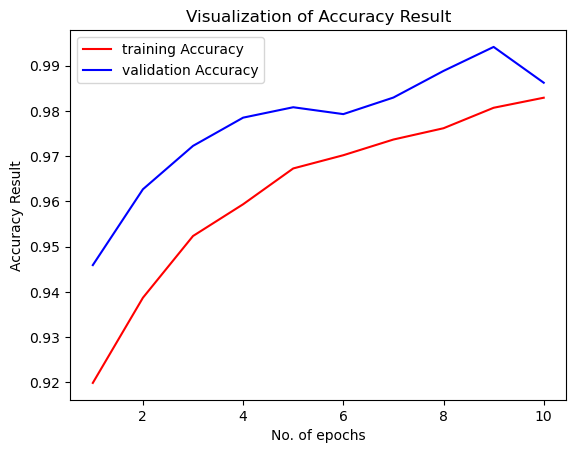

In [76]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metric for model evaluation

In [79]:
class_name = validation_set.class_names
class_name

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [15]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
)

Found 25661 files belonging to 14 classes.


In [17]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

NameError: name 'model' is not defined